## Develop a Logistic Regression

# Description

- This is the first part of lab 5. 
- Classifiers

# Note: 
This Jupyter Notebook is created based on the ISLP textbook; 

copyright: Jing Yi; jing.yi@wisc.edu
  

In [1]:
import ISLP
from ISLP import load_data
from ISLP.models import ModelSpec as MS

df_Smarket = load_data('Smarket')
print(df_Smarket.head(3))
print(df_Smarket.Year.unique())
print(df_Smarket.shape)


C:\Users\ekim298\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
[2001 2002 2003 2004 2005]
(1250, 9)


In [2]:
VarList = ['Lag1','Lag2']
X = MS(VarList).fit_transform(df_Smarket)
print(X)
y = df_Smarket.Direction=='Up'
print(y)

      intercept   Lag1   Lag2
0           1.0  0.381 -0.192
1           1.0  0.959  0.381
2           1.0  1.032  0.959
3           1.0 -0.623  1.032
4           1.0  0.614 -0.623
...         ...    ...    ...
1245        1.0  0.422  0.252
1246        1.0  0.043  0.422
1247        1.0 -0.955  0.043
1248        1.0  0.130 -0.955
1249        1.0 -0.298  0.130

[1250 rows x 3 columns]
0        True
1        True
2       False
3        True
4        True
        ...  
1245     True
1246    False
1247     True
1248    False
1249    False
Name: Direction, Length: 1250, dtype: bool


In [3]:
import statsmodels.api as sm
from ISLP.models import summarize
# GLM does not add a constant by default
# GLM is a more general form of logistic regression?
model_logistic = sm.GLM(y, X, family=sm.families.Binomial())
model_logistic = model_logistic.fit()
print(model_logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1247
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -864.20
Date:                Fri, 04 Oct 2024   Deviance:                       1728.4
Time:                        10:54:09   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002215
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0742      0.057      1.310      0.1

In [4]:
model_logistic.predict()

array([0.51388337, 0.49717971, 0.48944652, ..., 0.53509936, 0.52683598,
       0.5224288 ])

### Generate labels based on the predicted probabilities

In [5]:
import numpy as np

labels = np.array(['Down']*df_Smarket.shape[0])
labels[model_logistic.predict()>0.5] = 'Up'
labels

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype='<U4')

In [6]:
from ISLP import confusion_table
confusion_table(labels, df_Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,114,102
Up,488,546


In [7]:
np.mean(labels == df_Smarket.Direction)

0.528

### accuracy_score: 

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(df_Smarket.Direction, labels)

0.528

In [9]:
import numpy as np

labels = np.array(['Down']*df_Smarket.shape[0])
labels[model_logistic.predict()>0.6] = 'Up'
print(accuracy_score(df_Smarket.Direction, labels))
confusion_table(labels, df_Smarket.Direction)

0.4832


Truth,Down,Up
Predicted,,
Down,600,644
Up,2,4


In [10]:
import numpy as np

labels = np.array(['Down']*df_Smarket.shape[0])
labels[model_logistic.predict()>0.53] = 'Up'
print(accuracy_score(df_Smarket.Direction, labels))
confusion_table(labels, df_Smarket.Direction)

0.504


Truth,Down,Up
Predicted,,
Down,446,464
Up,156,184


## Evaluation (skipped in this version)

In [11]:
train_data = df_Smarket[df_Smarket['Year'] >= 2005]
print(train_data.head())
test_data = df_Smarket[df_Smarket['Year'] < 2005]

      Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
998   2005 -0.134  0.008 -0.007  0.715 -0.431  0.7869 -0.812      Down
999   2005 -0.812 -0.134  0.008 -0.007  0.715  1.5108 -1.167      Down
1000  2005 -1.167 -0.812 -0.134  0.008 -0.007  1.7210 -0.363      Down
1001  2005 -0.363 -1.167 -0.812 -0.134  0.008  1.7389  0.351        Up
1002  2005  0.351 -0.363 -1.167 -0.812 -0.134  1.5691 -0.143      Down


## LDA

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


In [13]:
lda = LDA(store_covariance=True)
X_lda = X.drop(columns=['intercept'])
model_lda = lda.fit(X_lda,y)

In [14]:
model_lda.means_

array([[ 0.05068605,  0.03229734],
       [-0.03969136, -0.02244444]])

Lecture note (Chapter 4 Part II), page 47/61
$$
    \hat{\mu}_k = \frac{1}{n_k} \sum_{i: y_i = k} x_i
$$

In [15]:
df_Smarket.groupby('Direction')[['Lag1','Lag2']].mean()

C:\Users\ekim298\AppData\Local\Temp\ipykernel_39816\2959362894.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Smarket.groupby('Direction')[['Lag1','Lag2']].mean()


,Lag1,Lag2
Direction,,
Down,0.050686,0.032297
Up,-0.039691,-0.022444


In [16]:
model_lda.covariance_
# what is this?

array([[ 1.28810287, -0.03515805],
       [-0.03515805,  1.28935176]])

In [18]:
# Calculate the covariance matrix for Lag1 and Lag2
covariance_matrix = df_Smarket[['Lag1', 'Lag2']].cov()

# Print the covariance matrix
print(covariance_matrix)

          Lag1      Lag2
Lag1  1.291175 -0.033950
Lag2 -0.033950  1.291133


Weighted within-class covariance matrix:
$$
    \hat{\sigma}^2 = \frac{1}{n - K} \sum_{k=1}^{K} \sum_{i: y_i = k} (x_i - \hat{\mu}_k)^2
$$

In [19]:
import statistics
statistics.variance(df_Smarket.Lag1)

df_Smarket_Up = df_Smarket[df_Smarket['Direction']=='Up']
print(df_Smarket_Up.head())
statistics.variance(df_Smarket_Up['Lag1'])


   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up
5  2001  0.213  0.614 -0.623  1.032  0.959  1.3491  1.392        Up


1.2791370668803785

In [20]:
# Group the data by the 'Direction' column and calculate the variance for Lag1 and Lag2
variance_by_direction = df_Smarket.groupby('Direction')[['Lag1', 'Lag2']].var()

# Print the result
print(variance_by_direction)

               Lag1      Lag2
Direction                    
Down       1.302041  1.339052
Up         1.279137  1.247171


C:\Users\ekim298\AppData\Local\Temp\ipykernel_39816\1142454788.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variance_by_direction = df_Smarket.groupby('Direction')[['Lag1', 'Lag2']].var()


    Lag1   Lag2  Direction
0  0.381 -0.192       True
1  0.959  0.381       True
2  1.032  0.959      False


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

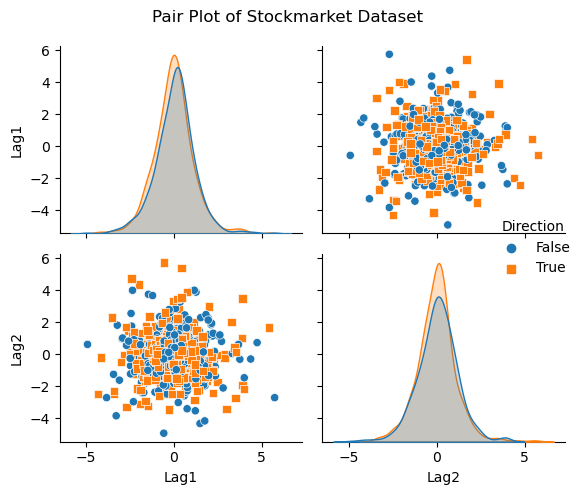

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# create a dataset: 
df_Ssmall = pd.concat([X_lda,y], axis=1)
print(df_Ssmall.head(3))

# plot: 
ax = sns.pairplot(df_Ssmall, hue='Direction', markers=["o", "s"])
plt.suptitle("Pair Plot of Stockmarket Dataset")

plt.tight_layout()
plt.show()

# Switch to the iris data

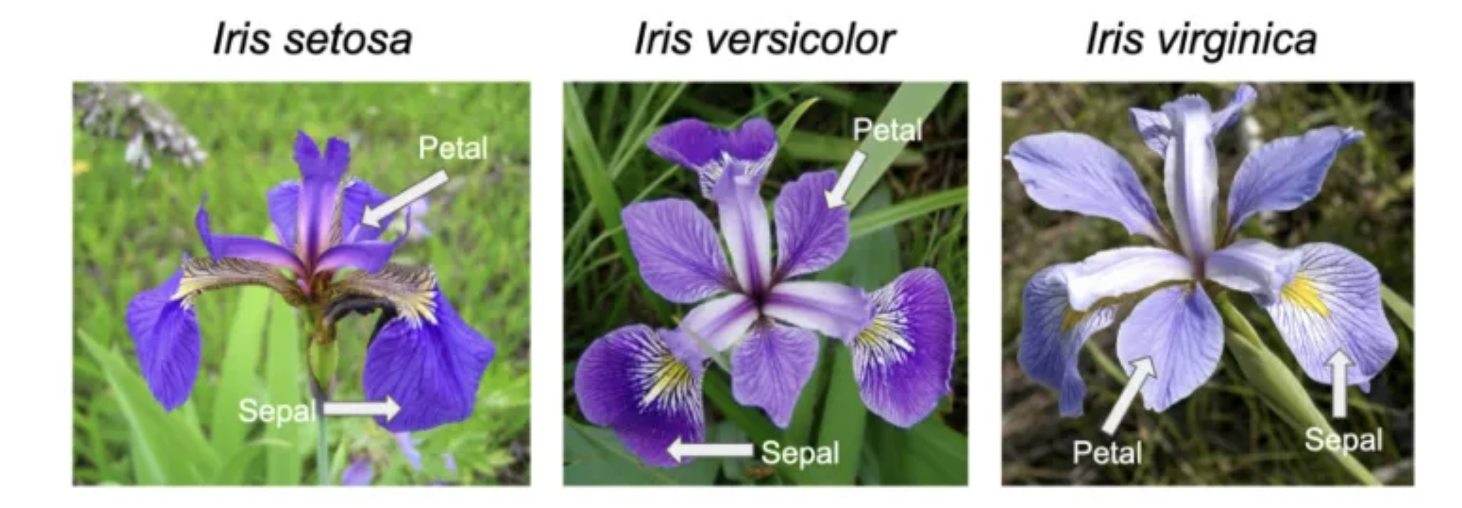


The **sepal** is the outermost part of a flower that forms the protective layer around the flower bud before it opens. Sepals tend to be more rigid and less colorful than petals.

This script is based on: https://developer.ibm.com/tutorials/awb-implementing-linear-discriminant-analysis-python/

In [22]:
from sklearn import datasets

df_iris_raw = datasets.load_iris()
df_iris_raw

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
from sklearn import datasets

df_iris_raw = datasets.load_iris()
# print(df_iris_raw)

# Convert the data to a DataFrame and add column names: 
df_iris = pd.DataFrame(df_iris_raw.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
print(df_iris)
df_iris['Class'] =  df_iris_raw.target
df_iris['Class'] = df_iris['Class'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
print(df_iris.head())

X_iris = df_iris.iloc[:,0:4].values
y_iris = df_iris.iloc[:,4].values
print(y[:3])

     sepal-length  sepal-width  petal-length  petal-width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
   sepal-length  sepal-width  petal-length  petal-width   Class
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6         

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

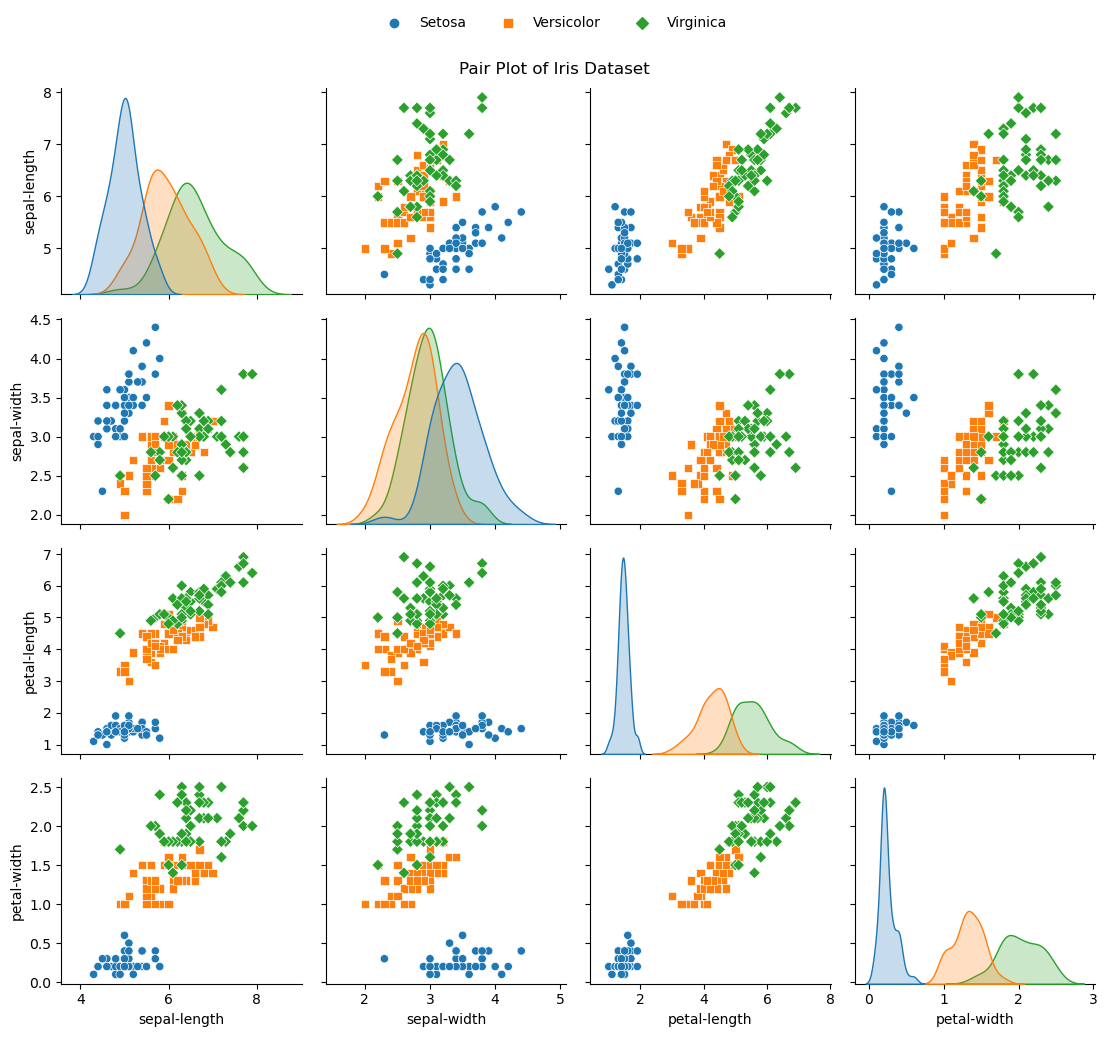

In [27]:
ax = sns.pairplot(df_iris, hue='Class', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

In [29]:
cls = df_iris.columns
print(cls)
for i, feature in enumerate(cls[:-1]):
    print(i)
    print(feature)

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'], dtype='object')
0
sepal-length
1
sepal-width
2
petal-length
3
petal-width


enumerate: both the index and the element for each loop iteration.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

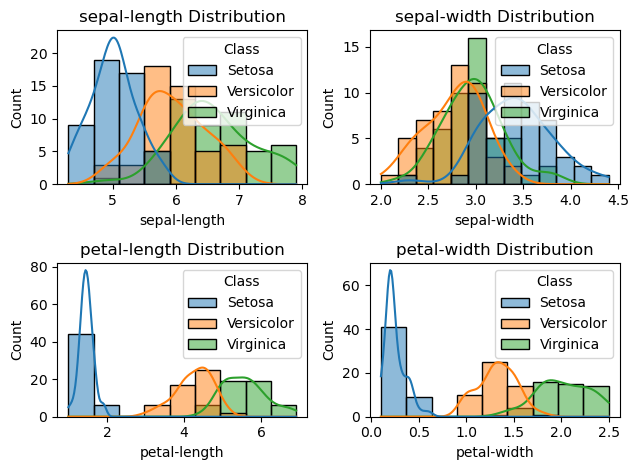

In [30]:
for i, feature in enumerate(cls[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df_iris, x=feature, hue='Class', kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

In [31]:
lda = LDA(store_covariance=True)
# lda = LDA()
model_lda_iris = lda.fit(X_iris, y_iris)
model_lda_iris.means_


array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [32]:
df_iris.groupby('Class')[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].mean()

,sepal-length,sepal-width,petal-length,petal-width
Class,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [33]:
model_lda_iris.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype='<U10')

In [34]:
model_lda_iris.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [35]:
df_iris_Setosa = df_iris[df_iris['Class'] == 'Setosa']
df_iris_Setosa.shape[0]/df_iris.shape[0]

0.3333333333333333

In [36]:
model_lda_iris.covariance_

array([[0.259708  , 0.09086667, 0.164164  , 0.03763333],
       [0.09086667, 0.11308   , 0.05413867, 0.032056  ],
       [0.164164  , 0.05413867, 0.181484  , 0.041812  ],
       [0.03763333, 0.032056  , 0.041812  , 0.041044  ]])

In [37]:
model_lda_iris.covariance_[:,:2]

array([[0.259708  , 0.09086667],
       [0.09086667, 0.11308   ],
       [0.164164  , 0.05413867],
       [0.03763333, 0.032056  ]])

In [39]:
print(f'something : {model_lda_iris.covariance_[1,2]:.2f}')

something : 0.05


In [40]:
model_lda_iris.predict_proba(X_iris)[:10]

array([[1.00000000e+00, 3.89635793e-22, 2.61116827e-42],
       [1.00000000e+00, 7.21796992e-18, 5.04214335e-37],
       [1.00000000e+00, 1.46384895e-19, 4.67593159e-39],
       [1.00000000e+00, 1.26853638e-16, 3.56661049e-35],
       [1.00000000e+00, 1.63738745e-22, 1.08260527e-42],
       [1.00000000e+00, 3.88328166e-21, 4.56654013e-40],
       [1.00000000e+00, 1.11346945e-18, 2.30260848e-37],
       [1.00000000e+00, 3.87758638e-20, 1.07449600e-39],
       [1.00000000e+00, 1.90281306e-15, 9.48293562e-34],
       [1.00000000e+00, 1.11180261e-18, 2.72405964e-38]])

In [41]:
y_iris[:10]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [42]:
y_pred_iris = model_lda_iris.predict(X_iris)

print(confusion_table(model_lda_iris.predict(X_iris), y_iris))
print(accuracy_score(y_iris, y_pred_iris))
len(X_iris)
3/150


Truth       Setosa  Versicolor  Virginica
Predicted                                
Setosa          50           0          0
Versicolor       0          48          1
Virginica        0           2         49
0.98


0.02

In [43]:
conf_df = confusion_table(model_lda_iris.predict(X_iris), y_iris)

# Add a "Total" row to sum up each column
conf_df.loc['Total'] = conf_df.sum()

# Add a "Total" column to sum up each row
# conf_df['Total'] = conf_df.sum(axis=1)

# Display the updated confusion table
conf_df

Truth,Setosa,Versicolor,Virginica
Predicted,,,
Setosa,50,0,0
Versicolor,0,48,1
Virginica,0,2,49
Total,50,50,50


In [44]:
mu_list = model_lda_iris.means_[:, :2]  # Select only the first two dimensions (sepal length and sepal width)
print(mu_list)

[[5.006 3.428]
 [5.936 2.77 ]
 [6.588 2.974]]


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa


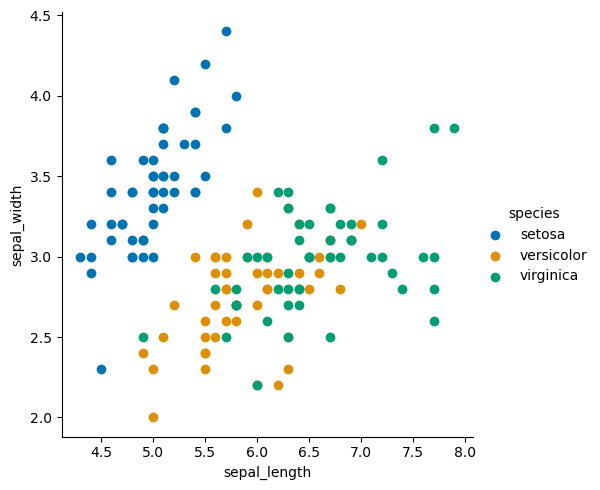

In [45]:
df_iris = sns.load_dataset("iris")
print(df_iris.head(2))
# Create a FacetGrid
# pastel
g = sns.FacetGrid(df_iris, hue="species", height=5, palette="colorblind")

# Map a scatter plot to the grid
g.map(plt.scatter, "sepal_length", "sepal_width").add_legend()

# Display the plot
plt.show()

In [46]:
df_iris['sepal_width'].min()

2.0

In [47]:
# itertools.combinations is a function from Python’s itertools module, 
# which generates all possible combinations of a specified length from a given iterable (in this case, a list).
import itertools

for i, v in enumerate(itertools.combinations([0, 1, 2], 2)):
    print(f"Index: {i}, Combination: {v}")


Index: 0, Combination: (0, 1)
Index: 1, Combination: (0, 2)
Index: 2, Combination: (1, 2)


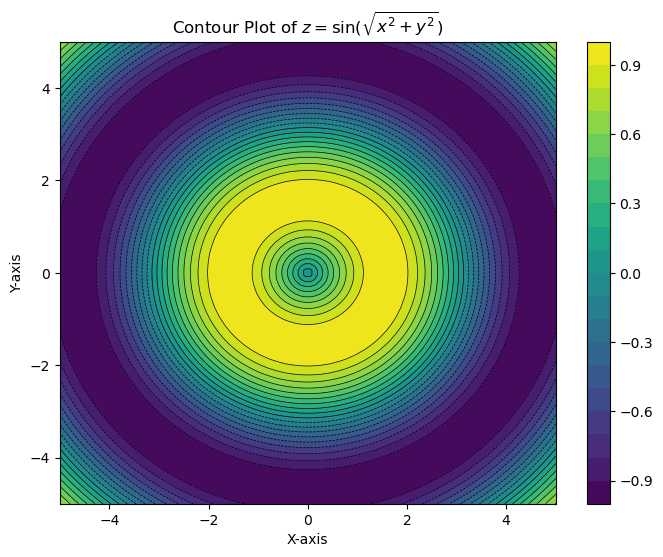

In [49]:
import numpy as np
import matplotlib.pyplot as plt


# Define the function we want to plot (e.g., a 2D quadratic function)
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values (the output of the function at each grid point)
Z = f(X, Y)

# Create the contour plot
plt.figure(figsize=(8, 6))

# Create filled contour plot with 20 levels and a colormap
contour_filled = plt.contourf(X, Y, Z, levels=20, cmap='viridis')

# Add contour lines
contour_lines = plt.contour(X, Y, Z, levels=20, colors='black', linewidths=0.5)

# Add a color bar to indicate the value of Z
plt.colorbar(contour_filled)

# Add labels and title
plt.title("Contour Plot of $z = \sin(\sqrt{x^2 + y^2})$")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()


###  LDA Decision Boundary Function:
$$ X^\top \Sigma^{-1} (\mu_1 - \mu_2) - \frac{1}{2} \left( \mu_1^\top \Sigma^{-1} \mu_1 - \mu_2^\top \Sigma^{-1} \mu_2 \right) + \log \left( \frac{\pi_1}{\pi_2} \right) = 0
$$

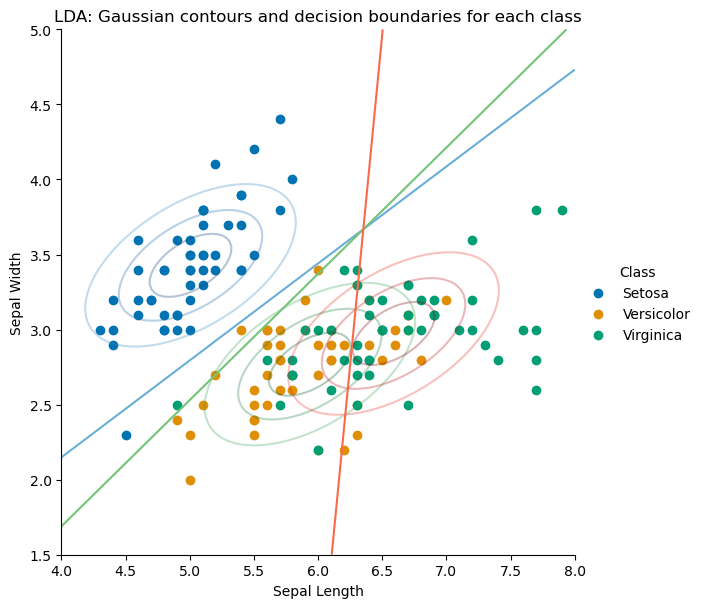

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import colors
import itertools
from scipy.stats import multivariate_normal

# Load and preprocess the iris dataset
from sklearn import datasets

# Prepare the iris dataset
df_iris_raw = datasets.load_iris()
df_iris = pd.DataFrame(df_iris_raw.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
df_iris['Class'] = df_iris_raw.target
df_iris['Class'] = df_iris['Class'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Features and labels
X_iris = df_iris.iloc[:, 0:4].values
y_iris = df_iris.iloc[:, 4].values

# LDA model
lda = LDA(store_covariance=True)
model_lda_iris = lda.fit(X_iris, y_iris)

# Get means, covariances, and class priors from the LDA model
mu_list = model_lda_iris.means_[:, :2]  # Select only the first two dimensions (sepal length and sepal width)
sigma = model_lda_iris.covariance_[:2, :2]  # Restrict covariance to 2D
pi_list = model_lda_iris.priors_

# Create a meshgrid for plotting decision boundaries
N = 100
X = np.linspace(4, 8, N)  # Adjust for feature values in the Iris dataset
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

# Initialize plot
color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)

g = sns.FacetGrid(df_iris, hue="Class", height=6, palette='colorblind')
g.map(plt.scatter, "sepal-length", "sepal-width").add_legend()
my_ax = g.ax


# Iterate over class pairs for plotting decision boundaries
for i, v in enumerate(itertools.combinations([0, 1, 2], 2)):
    mu = mu_list[i]
    Sigma = sigma

    # Compute multivariate Gaussian PDF for each class
    zz = np.array([multivariate_normal.pdf([xx, yy], mean=mu, cov=Sigma) 
                   for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    
    # Reshape the computed values
    Z = zz.reshape(X.shape)

    # Plot Gaussian contours
    my_ax.contour(X, Y, Z, levels=3, cmap=color_list[i], norm=my_norm, alpha=0.3)

    # Calculate decision boundary
    def calculate_boundary(X, mu1, mu2, Sigma, pi1, pi2):
        inv_Sigma = np.linalg.inv(Sigma)
        return X.T @ inv_Sigma @ (mu1 - mu2) - 0.5 * (mu1.T @ inv_Sigma @ mu1 - mu2.T @ inv_Sigma @ mu2) + np.log(pi1 / pi2)

    # Compute decision boundary between class pairs. 
     # The value of the discriminant function for the point X
#     If the result is positive, the point is classified as belonging to class 1.
#     If the result is negative, the point is classified as belonging to class 2.
#     If the result is zero, the point lies exactly on the decision boundary between the two classes.
    bb = np.array([calculate_boundary(np.array([xx, yy]).reshape(-1, 1), 
                                      mu_list[v[0]].reshape(-1, 1), 
                                      mu_list[v[1]].reshape(-1, 1), sigma, pi_list[v[0]], pi_list[v[1]])
                   for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    # Reshape and plot boundary
    B = bb.reshape(X.shape)
    my_ax.contour(X, Y, B, levels=[0], cmap=color_list[i], norm=my_norm)

# Set axis labels and title
my_ax.set_xlabel('Sepal Length')
my_ax.set_ylabel('Sepal Width')
my_ax.set_title('LDA: Gaussian contours and decision boundaries for each class')

plt.show()

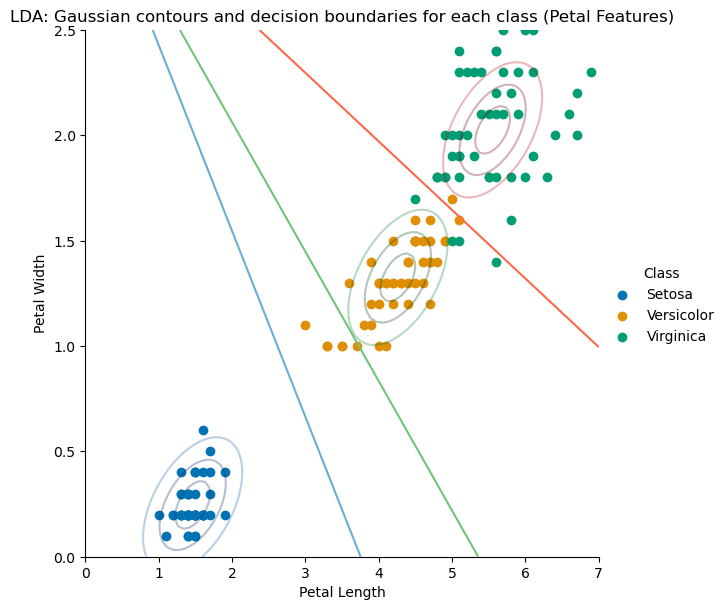

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import colors
import itertools
from scipy.stats import multivariate_normal

# Load and preprocess the iris dataset
from sklearn import datasets

# Prepare the iris dataset
df_iris_raw = datasets.load_iris()
df_iris = pd.DataFrame(df_iris_raw.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
df_iris['Class'] = df_iris_raw.target
df_iris['Class'] = df_iris['Class'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Features (petal-length and petal-width) and labels
X_iris = df_iris[['petal-length', 'petal-width']].values
y_iris = df_iris['Class'].values

# LDA model
lda = LDA(store_covariance=True)
model_lda_iris = lda.fit(X_iris, y_iris)

# Get means, covariances, and class priors from the LDA model
mu_list = model_lda_iris.means_  # Means for petal length and petal width
sigma = model_lda_iris.covariance_  # Covariance matrix for petal length and petal width
pi_list = model_lda_iris.priors_  # Class priors

# Create a meshgrid for plotting decision boundaries
N = 100
X = np.linspace(0, 7, N)  # Adjust for petal length values in the Iris dataset
Y = np.linspace(0, 2.5, N)  # Adjust for petal width values in the Iris dataset
X, Y = np.meshgrid(X, Y)

# Initialize plot
color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)

g = sns.FacetGrid(df_iris, hue="Class", height=6, palette='colorblind')
g.map(plt.scatter, "petal-length", "petal-width").add_legend()
my_ax = g.ax

# Iterate over class pairs for plotting decision boundaries
for i, v in enumerate(itertools.combinations([0, 1, 2], 2)):
    mu = mu_list[i]
    Sigma = sigma

    # Compute multivariate Gaussian PDF for each class
    zz = np.array([multivariate_normal.pdf([xx, yy], mean=mu, cov=Sigma) 
                   for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    
    # Reshape the computed values
    Z = zz.reshape(X.shape)

    # Plot Gaussian contours
    my_ax.contour(X, Y, Z, levels=3, cmap=color_list[i], norm=my_norm, alpha=0.3)

    # Calculate decision boundary
    def calculate_boundary(X, mu1, mu2, Sigma, pi1, pi2):
        inv_Sigma = np.linalg.inv(Sigma)
        return X.T @ inv_Sigma @ (mu1 - mu2) - 0.5 * (mu1.T @ inv_Sigma @ mu1 - mu2.T @ inv_Sigma @ mu2) + np.log(pi1 / pi2)

    # Compute decision boundary between class pairs
    bb = np.array([calculate_boundary(np.array([xx, yy]).reshape(-1, 1), 
                                      mu_list[v[0]].reshape(-1, 1), 
                                      mu_list[v[1]].reshape(-1, 1), sigma, pi_list[v[0]], pi_list[v[1]])
                   for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    
    # Reshape and plot boundary
    B = bb.reshape(X.shape)
    my_ax.contour(X, Y, B, levels=[0], cmap=color_list[i], norm=my_norm)

# Set axis labels and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('LDA: Gaussian contours and decision boundaries for each class (Petal Features)')

plt.show()

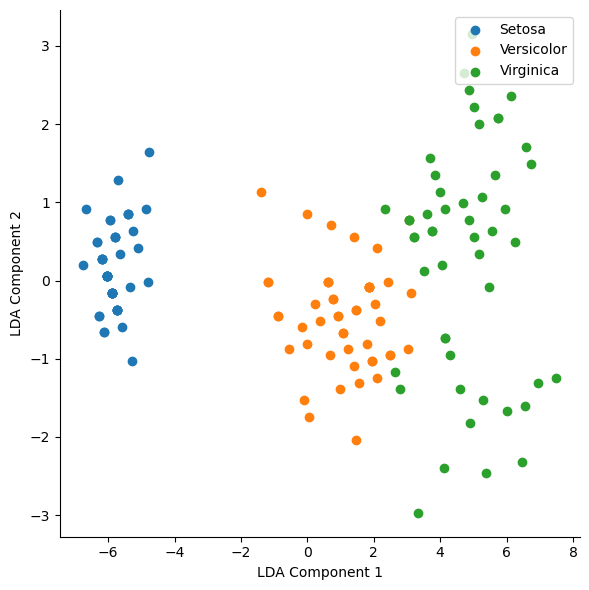

In [53]:
X_transform = lda.fit_transform(X_iris, y_iris)
# print(X_transform)

tmp_Df = pd.DataFrame(X_transform, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['Class']=y_iris

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')
# This is different from the LDA analysis. LDA components....


# Quadratic Discriminant Analysis

In [54]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

model_qda = QDA(store_covariance=True)
model_qda.fit(X_iris, y_iris)



QuadraticDiscriminantAnalysis(store_covariance=True)

In [55]:
model_qda.means_

array([[1.462, 0.246],
       [4.26 , 1.326],
       [5.552, 2.026]])

In [56]:
model_qda.covariance_

[array([[0.03015918, 0.00606939],
        [0.00606939, 0.01110612]]),
 array([[0.22081633, 0.07310204],
        [0.07310204, 0.03910612]]),
 array([[0.30458776, 0.04882449],
        [0.04882449, 0.07543265]])]

In [57]:
ct_qda = confusion_table(model_qda.predict(X_iris), y_iris)
ct_qda.loc['Total'] = ct_qda.sum()
ct_qda

Truth,Setosa,Versicolor,Virginica
Predicted,,,
Setosa,50,0,0
Versicolor,0,49,2
Virginica,0,1,48
Total,50,50,50


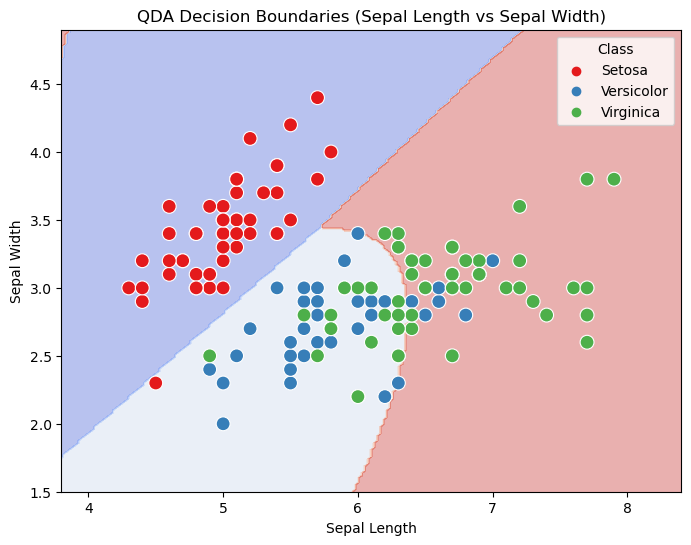

In [58]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

# Load the Iris dataset
df_iris_raw = datasets.load_iris()

# Convert to DataFrame and add column names
df_iris = pd.DataFrame(df_iris_raw.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
df_iris['Class'] = df_iris_raw.target
df_iris['Class'] = df_iris['Class'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Only use the first two features (sepal-length, sepal-width) for visualization
X_iris = df_iris.iloc[:, 0:2].values
y_iris = df_iris_raw.target  # Integer-encoded labels for contour plot

# Fit the QDA model
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_iris, y_iris)

# Create a meshgrid over the feature space
x_min, x_max = X_iris[:, 0].min() - 0.5, X_iris[:, 0].max() + 0.5
y_min, y_max = X_iris[:, 1].min() - 0.5, X_iris[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict the class for each point on the grid
Z = model_qda.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')  # Plot decision boundaries
sns.scatterplot(x=X_iris[:, 0], y=X_iris[:, 1], hue=df_iris['Class'], palette='Set1', s=100)  # Plot the data points

# Labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('QDA Decision Boundaries (Sepal Length vs Sepal Width)')
plt.show()

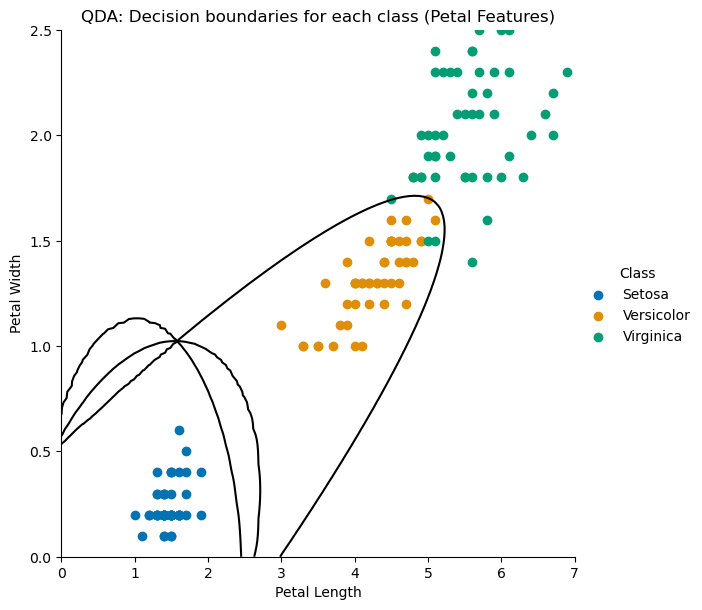

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from matplotlib import colors
import itertools
from scipy.stats import multivariate_normal

# Load and preprocess the iris dataset
from sklearn import datasets

# Prepare the iris dataset
df_iris_raw = datasets.load_iris()
df_iris = pd.DataFrame(df_iris_raw.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
df_iris['Class'] = df_iris_raw.target
df_iris['Class'] = df_iris['Class'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Features and labels (petal length and petal width for visualization)
X_iris = df_iris[['petal-length', 'petal-width']].values
y_iris = df_iris['Class'].values

# QDA model
qda = QDA(store_covariance=True)
model_qda_iris = qda.fit(X_iris, y_iris)

# Create a meshgrid for plotting decision boundaries
N = 100
X = np.linspace(0, 7, N)  # Petal length range
Y = np.linspace(0, 2.5, N)  # Petal width range
X, Y = np.meshgrid(X, Y)

# Initialize plot
g = sns.FacetGrid(df_iris, hue="Class", height=6, palette='colorblind')
g.map(plt.scatter, "petal-length", "petal-width").add_legend()
my_ax = g.ax

# Iterate over class pairs for plotting decision boundaries
for i, v in enumerate(itertools.combinations([0, 1, 2], 2)):
    # Compute decision boundary between class pairs
    def calculate_boundary(X, model, class1, class2):
        scores1 = model.predict_proba(X)[:, class1]
        scores2 = model.predict_proba(X)[:, class2]
        return scores1 - scores2
    
    X_mesh = np.c_[X.ravel(), Y.ravel()]  # Flatten the meshgrid points
    Z = calculate_boundary(X_mesh, model_qda_iris, v[0], v[1])
    Z = Z.reshape(X.shape)  # Reshape back to the meshgrid shape
    
    # Plot the decision boundary
    my_ax.contour(X, Y, Z, levels=[0], colors='black')

# Set axis labels and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('QDA: Decision boundaries for each class (Petal Features)')

plt.show()

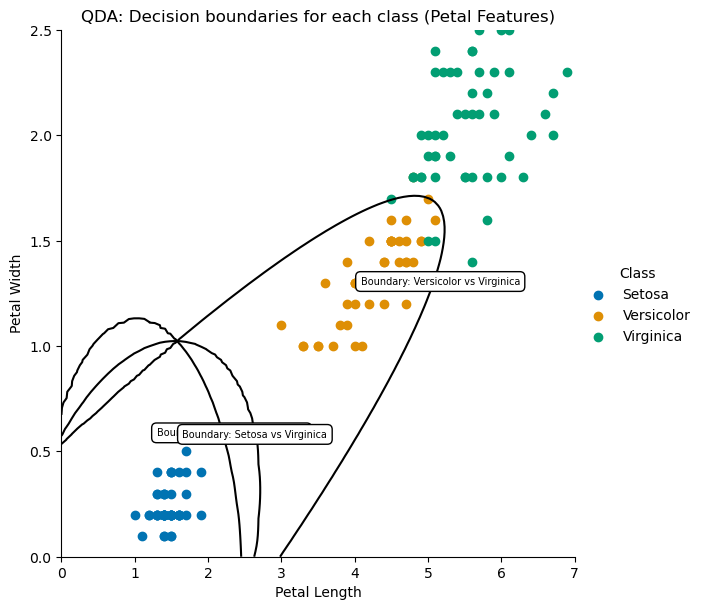

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from matplotlib import colors
import itertools

# Load and preprocess the iris dataset
from sklearn import datasets

# Prepare the iris dataset
df_iris_raw = datasets.load_iris()
df_iris = pd.DataFrame(df_iris_raw.data, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
df_iris['Class'] = df_iris_raw.target
df_iris['Class'] = df_iris['Class'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Features and labels (petal length and petal width for visualization)
X_iris = df_iris[['petal-length', 'petal-width']].values
y_iris = df_iris['Class'].values

# QDA model
qda = QDA(store_covariance=True)
model_qda_iris = qda.fit(X_iris, y_iris)

# Create a meshgrid for plotting decision boundaries
N = 100
X = np.linspace(0, 7, N)  # Petal length range
Y = np.linspace(0, 2.5, N)  # Petal width range
X, Y = np.meshgrid(X, Y)

# Initialize plot
g = sns.FacetGrid(df_iris, hue="Class", height=6, palette='colorblind')
g.map(plt.scatter, "petal-length", "petal-width").add_legend()
my_ax = g.ax

# Iterate over class pairs for plotting decision boundaries
for i, v in enumerate(itertools.combinations([0, 1, 2], 2)):
    # Compute decision boundary between class pairs
    def calculate_boundary(X, model, class1, class2):
        scores1 = model.predict_proba(X)[:, class1]
        scores2 = model.predict_proba(X)[:, class2]
        return scores1 - scores2
    
    X_mesh = np.c_[X.ravel(), Y.ravel()]  # Flatten the meshgrid points
    Z = calculate_boundary(X_mesh, model_qda_iris, v[0], v[1])
    Z = Z.reshape(X.shape)  # Reshape back to the meshgrid shape
    
    # Plot the decision boundary and store the contour lines
    contours = my_ax.contour(X, Y, Z, levels=[0], colors='black')
    
    # Annotate the decision boundaries
    for j, line in enumerate(contours.collections):
        # Get the middle point on the contour path for annotation
        path = line.get_paths()[0]
        midpoint = path.vertices[len(path.vertices) // 2] -0.5
        
        # Define the class pair label for the annotation
        class_pair_label = f"Boundary: {df_iris['Class'].unique()[v[0]]} vs {df_iris['Class'].unique()[v[1]]}"
        
        # Add annotation near the midpoint of the contour
        my_ax.annotate(class_pair_label, xy=midpoint, xytext=(midpoint[0] + 0.1, midpoint[1] + 0.1),
                       fontsize=7, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Set axis labels and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('QDA: Decision boundaries for each class (Petal Features)')

plt.show()


# Naive Bayes


In [61]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_iris, y_iris)

GaussianNB()

In [62]:
model_nb.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype='<U10')

In [63]:
model_nb.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [64]:
model_nb.theta_

array([[1.462, 0.246],
       [4.26 , 1.326],
       [5.552, 2.026]])

In [65]:
model_nb.var_

array([[0.029556, 0.010884],
       [0.2164  , 0.038324],
       [0.298496, 0.073924]])

In [66]:
model_nb.predict(X_iris)

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica'

In [239]:
ct_nb = confusion_table(model_nb.predict(X_iris), y_iris)
ct_nb

Truth,Setosa,Versicolor,Virginica
Predicted,,,
Setosa,50,0,0
Versicolor,0,47,3
Virginica,0,3,47


# KNN

In [240]:
from sklearn.neighbors import KNeighborsClassifier

model_knn1 = KNeighborsClassifier(n_neighbors=1)
model_knn1.fit(X_iris,y_iris)
ct_knn = confusion_table(model_knn1.predict(X_iris),y_iris)
ct_knn.loc['Total'] = ct_knn.sum()
ct_knn

Truth,Setosa,Versicolor,Virginica
Predicted,,,
Setosa,50,0,0
Versicolor,0,50,2
Virginica,0,0,48
Total,50,50,50


In [241]:
## Tuning Parameters

In [242]:
for k in range(1,10):
    model_knn_tune = KNeighborsClassifier(n_neighbors=k)
    model_knn_tune = model_knn_tune.fit(X_iris,y_iris)
    model_knn_tune_pred = model_knn_tune.predict(X_iris)
    ct_knn_tune = confusion_table(model_knn_tune_pred,y_iris)
    ct_knn_tune.loc['Total'] = ct_knn_tune.sum()
    print(k)
    print(ct_knn_tune)
    
    
    

1
Truth       Setosa  Versicolor  Virginica
Predicted                                
Setosa          50           0          0
Versicolor       0          50          2
Virginica        0           0         48
Total           50          50         50
2
Truth       Setosa  Versicolor  Virginica
Predicted                                
Setosa          50           0          0
Versicolor       0          50          4
Virginica        0           0         46
Total           50          50         50
3
Truth       Setosa  Versicolor  Virginica
Predicted                                
Setosa          50           0          0
Versicolor       0          49          2
Virginica        0           1         48
Total           50          50         50
4
Truth       Setosa  Versicolor  Virginica
Predicted                                
Setosa          50           0          0
Versicolor       0          49          3
Virginica        0           1         47
Total           50        

K=1:
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  2 48]]
Accuracy: 0.99
------------------------------
K=2:
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  4 46]]
Accuracy: 0.97
------------------------------
K=3:
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  2 48]]
Accuracy: 0.98
------------------------------
K=4:
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  3 47]]
Accuracy: 0.97
------------------------------
K=5:
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Accuracy: 0.96
------------------------------
K=6:
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]
Accuracy: 0.97
------------------------------
K=7:
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]
Accuracy: 0.97
------------------------------
K=8:
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]
Accuracy: 0.97
------------------------------
K=9:
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Accuracy: 0.96
------------------------------


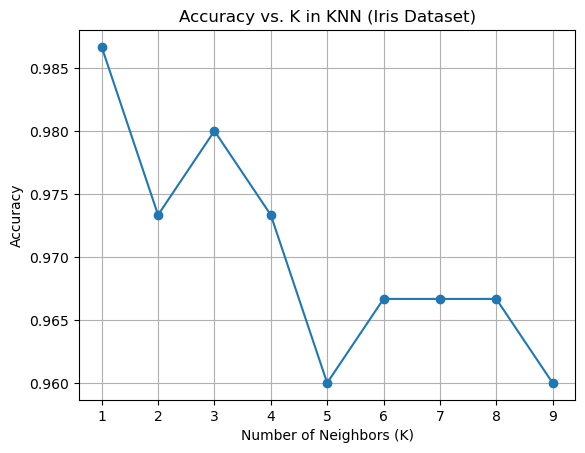

In [243]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Arrays to store accuracy and confusion matrices for each k
accuracies = []
confusion_matrices = []

# Tuning K and collecting results
for k in range(1, 10):
    model_knn_tune = KNeighborsClassifier(n_neighbors=k)
    model_knn_tune = model_knn_tune.fit(X_iris, y_iris)
    model_knn_tune_pred = model_knn_tune.predict(X_iris)
    
    # Confusion matrix

    ct_knn_tune = confusion_matrix(y_iris, model_knn_tune_pred)
    confusion_matrices.append(ct_knn_tune)
    
    # Accuracy
    accuracy = accuracy_score(y_iris, model_knn_tune_pred)
    accuracies.append(accuracy)
    
    # Print results for each k
    print(f'K={k}:')
    print('Confusion Matrix:')
    print(ct_knn_tune)
    print(f'Accuracy: {accuracy:.2f}')
    print('-'*30)

# Plotting the accuracy vs. k
plt.plot(range(1, 10), accuracies, marker='o')
plt.title('Accuracy vs. K in KNN (Iris Dataset)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()